# Principal Component Analysis

### 1- Description

- If the dataset includes a large number of variables, it can be difficult to visualise it
- It is useful to truncate the number or variables into a small number of dimensions in order to be able to visualise the most critical dimensions
- This means that we are looking for a representation of the data in a lower dimensional space
- The task is to find representative dimensions for the dataset derived from a linear combination of the original variables and order them from the most important to the least important
- This is what Principal Component Analysis (PCA) aims to accomplish

### 2- Iris Dataset

- The Iris dataset consists of 3 different kinds of irises (Setosa, Versicolor, and Virginica)
- The variables are petal and sepal length and width
- The classes correspond to 0 - Setosa, 1 - Versicolor, 2 - Virginica

First we import the iris dataset

In [1]:
# Import a dummy dataset (iris)
from sklearn import datasets

# Load the dataset
iris = datasets.load_iris()

We then import any modules we may use

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We now create the data frames we will need

In [4]:
# Create the features and class data frames
iris_features = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_class = pd.DataFrame(iris.target,columns=['Class'])

# Create a complete data frame
iris_data = pd.concat([iris_features,iris_class],axis=1)

It is useful to understand the data we are dealing with. In the above, iris_features is a dataframe consisting only of the explanatory variables - sepal length (cm), sepal width (cm), petal length (cm) and petal width (cm) - whereas the iris_class dataframe consists of only the response variable - Class.

A pairplot is useful in quickly investigating any relationships between the variables. We can see from the pairplot below that petal width and petal length are correlated and either are an indicator to the class of the iris. However this is not true for the sepal width and sepal length. It can be seen that a large sepal width and a small sepal length may be indicative of class 2 - Virginica. We therefore expect that there exists a principal component with these two variables having opposite signs.

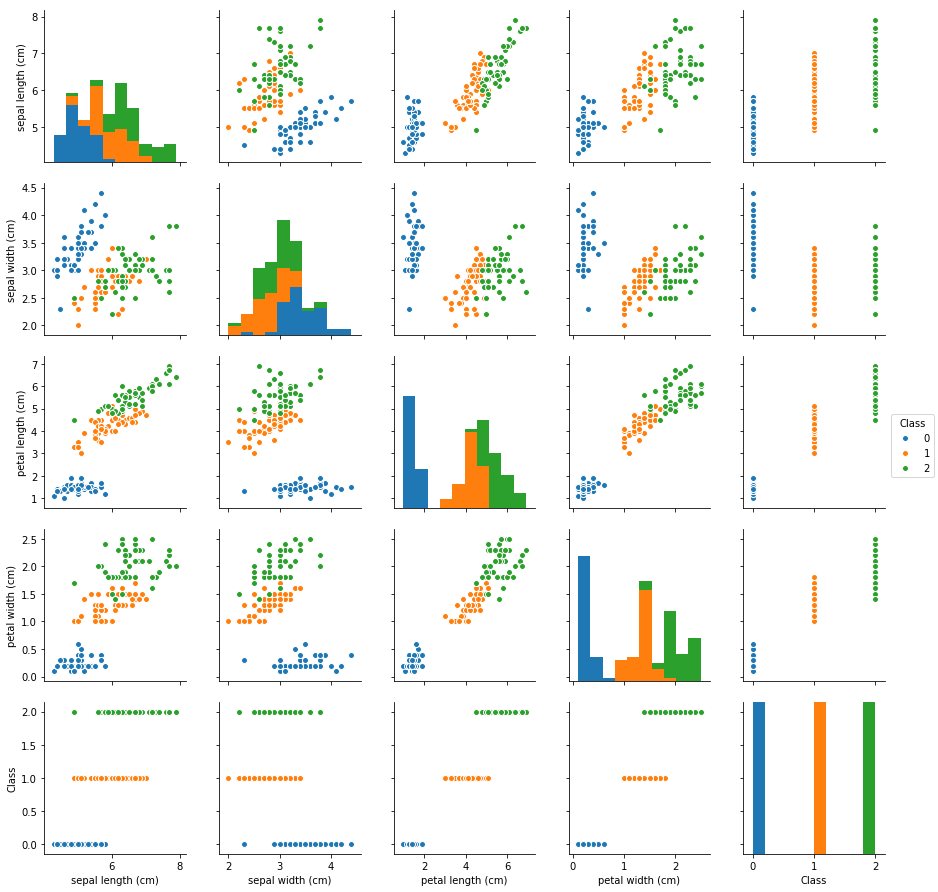

In [5]:
# Create a pairplot of each variable to identify if there is the class is easily distinguishable
sns.pairplot(data=iris_data,hue='Class')

### 3- Principal Component Analysis (PCA)

The idea behind PCA is the determination of orthonormal dimensions such that each dimension captures an axis with approximately maximum variance. For example in a simplified plot below of petal length, petal width and class, the maximum variance is obtained approximately along the petal width = petal length line, since the projections of the points onto this line has the largest variance.

In [6]:
def colorify(x):
    if x==0:
        return 'blue'
    elif x==1:
        return 'orange'
    else:
        return 'green'
    
color = iris_data['Class'].apply(colorify)

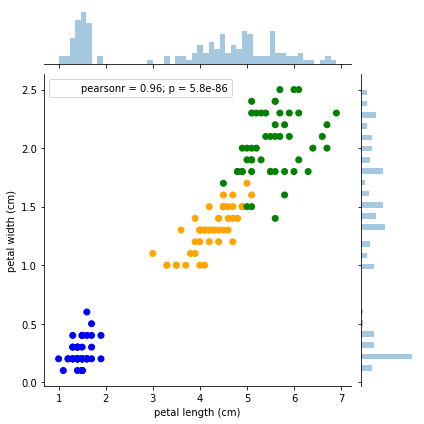

In [7]:
sns.jointplot(x=iris_data['petal length (cm)'],y=iris_data['petal width (cm)'],joint_kws=dict({'color' : color}),marginal_kws=dict({'bins': 50}))

Let there be $p$ variables in our dataset with $\bf{X} = (\bf{X_1},\bf{X_2},...,\bf{X_p})$ a column vector of random variables representing the variables of the dataset. A principal component, $\bf{P}$, then has the form

$$\bf{P} = \alpha_{11} \bf{X_1} + \alpha_{12} \bf{X_2} + ... + \alpha_{1p} \bf{X_p} = \sum_i fd$$

Then the *first principal component* is the linear combination of the variables which results in the greatest variance.